In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#装载数据集

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

#查看部分数据
train_df.head()

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,diedLat,diedCoordinates,gender,year,category,motivation,institutionName,institutionCity,institutionCountry,prizeold
0,Gerhart Johann Robert Hauptmann,1862,1946,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,50.822107,"50.8221069, 15.6171685",male,1912,literature,"""primarily in recognition of his fruitful, var...",NaN,NaN,NaN,50
1,Dag Hjalmar Agne Carl Hammarskj枚ld,1905,1961,Sweden,Sweden,J枚nk枚ping,J枚nk枚ping,"J枚nk枚ping, Sweden",14.161788,57.782614,...,-12.990641,"-12.9906407, 28.6498144",male,1961,peace,NaN,NaN,NaN,NaN,56
2,Ivo Andric,1892,1975,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,44.786568,"44.786568, 20.4489216",male,1961,literature,"""for the epic force with which he has traced t...",NaN,NaN,NaN,69
3,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,55.755826,"55.755826, 37.6172999",male,1958,physics,"""for the discovery and the interpretation of t...",University of Moscow,Moscow,USSR,50
4,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,55.755826,"55.755826, 37.6172999",male,1958,physics,"""for the discovery and the interpretation of t...",P.N. Lebedev Physical Institute,Moscow,USSR,50


In [3]:
'''
这是一个包含1901-2017 年诺贝尔奖获得者的出生地和死亡地的地理空间数据，来源为https://github.com/melaniewalsh/Intro-Cultural-Analytics/tree/master/book/data/nobel-prize-winners
该数据集包括他们的姓名，出生和死亡日期，原出生国家、城市和它们的现命名，原出生地和现命名，出生地点经纬度，原死亡国家、城市和它们的现命名，死亡地点经纬度，
获得诺贝尔奖的年份、门类和学院授予他们奖项的原因的简要描述，性别，所属组织
'''

#查看
#column data type
#column not-null count
train_df.info()

#发现存在null的字段挺多，有的缺失将近40%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  800 non-null    object 
 1   born                  800 non-null    int64  
 2   died                  800 non-null    int64  
 3   bornCountry_original  800 non-null    object 
 4   bornCountry_now       800 non-null    object 
 5   bornCity_original     799 non-null    object 
 6   bornCity_now          799 non-null    object 
 7   bornLocation          799 non-null    object 
 8   bornLong              788 non-null    float64
 9   bornLat               788 non-null    float64
 10  bornCoordinates       788 non-null    object 
 11  diedCountry_original  514 non-null    object 
 12  diedCountry_now       514 non-null    object 
 13  diedCity_original     509 non-null    object 
 14  diedCity_now          509 non-null    object 
 15  diedLocation          5

In [4]:
#显示有没有空值
train_df.isnull().any()

name                    False
born                    False
died                    False
bornCountry_original    False
bornCountry_now         False
bornCity_original        True
bornCity_now             True
bornLocation             True
bornLong                 True
bornLat                  True
bornCoordinates          True
diedCountry_original     True
diedCountry_now          True
diedCity_original        True
diedCity_now             True
diedLocation             True
diedLong                 True
diedLat                  True
diedCoordinates          True
gender                  False
year                    False
category                False
motivation               True
institutionName          True
institutionCity          True
institutionCountry       True
prizeold                False
dtype: bool

In [5]:
train_df.isnull().sum()

name                      0
born                      0
died                      0
bornCountry_original      0
bornCountry_now           0
bornCity_original         1
bornCity_now              1
bornLocation              1
bornLong                 12
bornLat                  12
bornCoordinates          12
diedCountry_original    286
diedCountry_now         286
diedCity_original       291
diedCity_now            291
diedLocation            291
diedLong                289
diedLat                 289
diedCoordinates         289
gender                    0
year                      0
category                  0
motivation               54
institutionName         170
institutionCity         179
institutionCountry      178
prizeold                  0
dtype: int64

In [6]:
missing_values = train_df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name','missing_count']
missing_values

,column_name,missing_count
0,name,0
1,born,0
2,died,0
3,bornCountry_original,0
4,bornCountry_now,0
5,bornCity_original,1
6,bornCity_now,1
7,bornLocation,1
8,bornLong,12
9,bornLat,12


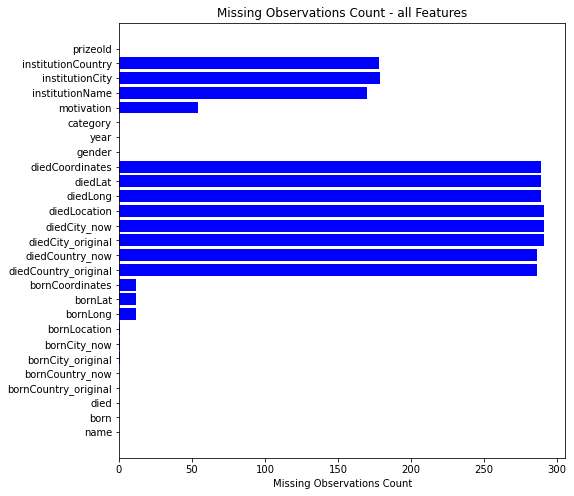

In [7]:
ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,8))
rects = ax.barh(ind, missing_values.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values)
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - all Features")
plt.show()

In [8]:
#空值的比例(部分)

def count_null(name,df):
    total_count = df.shape[0]
    NULL_count = df.shape[0] - df.count()
    print(name,"NULL ratio:", NULL_count,"/",total_count)
    
count_null("motivation",train_df["motivation"])
count_null("institutionCountry",train_df["institutionCountry"])
count_null("diefLocation",train_df["diedLocation"])

motivation NULL ratio: 54 / 800
institutionCountry NULL ratio: 178 / 800
diefLocation NULL ratio: 291 / 800


In [9]:
#描述性信息（数值型）
#max,min,25%,50%,75%
#mean,std

train_df.describe()

,born,died,bornLong,bornLat,diedLong,diedLat,year,prizeold
count,800.000000,800.000000,788.000000,788.000000,511.000000,511.000000,800.000000,800.000000
mean,1912.305000,1294.990000,-17.397996,43.711483,-30.046657,43.969438,1971.786250,59.481250
std,30.694008,940.735592,61.205952,13.699457,56.083134,12.397189,32.322848,12.335208
min,1817.000000,0.000000,-157.858333,-41.270632,-157.858333,-34.603684,1901.000000,17.000000
25%,1894.750000,0.000000,-74.005973,40.678178,-76.456477,40.233943,1950.000000,50.000000
50%,1917.000000,1955.000000,-0.127758,45.070312,-0.229530,44.953703,1977.000000,60.000000
75%,1936.250000,1992.000000,14.437800,51.750116,9.733169,51.507351,2000.000000,69.000000
max,1997.000000,2018.000000,176.194649,64.126521,151.209295,69.649205,2017.000000,90.000000


In [10]:
#描述性信息（另一部分）
train_df.describe(include = ['object'])

,name,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornCoordinates,diedCountry_original,diedCountry_now,diedCity_original,diedCity_now,diedLocation,diedCoordinates,gender,category,motivation,institutionName,institutionCity,institutionCountry
count,800,800,800,799,799,799,788,514,514,509,509,509,511,800,800,746,630,621,622
unique,741,105,65,514,513,514,499,47,44,253,253,255,254,2,6,484,275,166,27
top,Jack W. Szostak,USA,USA,"New York, NY","New York, NY","New York, NY, USA","40.7127753, -74.0059728",USA,USA,Cambridge,Cambridge,"Cambridge, United Kingdom","40.7127753, -74.0059728",male,physics,"""for the discovery and the interpretation of t...",University of California,"Cambridge, MA",USA
freq,3,285,285,49,49,49,49,204,204,20,20,20,20,759,200,5,30,46,338


In [11]:
#distinct values
print("以下可能是类别型")
print("gender distinct values", train_df['gender'].nunique())
print("category distinct values", train_df['category'].nunique())
print("bornCountry_original distinct values", train_df['bornCountry_original'].nunique())
print("bornCountry_now distinct values", train_df['bornCountry_now'].nunique())
print("diedCountry_original distinct values", train_df['diedCountry_original'].nunique())
print("diedCountry_now distinct values", train_df['diedCountry_now'].nunique())

print("")

print("以下可能是数值型")
print("name distinct values", train_df['name'].nunique())
print("bornLocation distinct values", train_df['bornLocation'].nunique())
print("born distinct values", train_df['born'].nunique())
print("died distinct values", train_df['died'].nunique())
print("bornCity_original distinct values", train_df['bornCity_original'].nunique())
print("bornCity_now distinct values", train_df['bornCity_now'].nunique())
print("bornLong distinct values", train_df['bornLong'].nunique())
print("bornLat distinct values", train_df['bornLat'].nunique())
print("bornCoordinates distinct values", train_df['bornCoordinates'].nunique())
print("diedCity_original distinct values", train_df['diedCity_original'].nunique())
print("diedCity_now distinct values", train_df['diedCity_now'].nunique())
print("diedLocation distinct values", train_df['diedLocation'].nunique())
print("diedLong distinct values", train_df['diedLong'].nunique())
print("diedLat distinct values", train_df['diedLat'].nunique())
print("diedCoordinates distinct values", train_df['diedCoordinates'].nunique())
print("year distinct values", train_df['year'].nunique())
print("motivation distinct values", train_df['motivation'].nunique())
print("institutionName distinct values", train_df['institutionName'].nunique())
print("institutionCity distinct values", train_df['institutionCity'].nunique())
print("institutionCountry distinct values", train_df['institutionCountry'].nunique())
print("")
print("进一步分析，部分字段虽然取值多，但可能不是数值型，而是类别型")

以下可能是类别型
gender distinct values 2
category distinct values 6
bornCountry_original distinct values 105
bornCountry_now distinct values 65
diedCountry_original distinct values 47
diedCountry_now distinct values 44

以下可能是数值型
name distinct values 741
bornLocation distinct values 514
born distinct values 134
died distinct values 110
bornCity_original distinct values 514
bornCity_now distinct values 513
bornLong distinct values 499
bornLat distinct values 499
bornCoordinates distinct values 499
diedCity_original distinct values 253
diedCity_now distinct values 253
diedLocation distinct values 255
diedLong distinct values 254
diedLat distinct values 254
diedCoordinates distinct values 254
year distinct values 114
motivation distinct values 484
institutionName distinct values 275
institutionCity distinct values 166
institutionCountry distinct values 27

进一步分析，部分字段虽然取值多，但可能不是数值型，而是类别型


In [12]:
print("gender", train_df['gender'].value_counts())
print("")
print("category", train_df['category'].value_counts())
print("")
print("bornCountry_now", train_df['bornCountry_now'].value_counts())
print("")
print("institutionCountry", train_df['institutionCountry'].value_counts())
print("")
print("motivation",train_df['motivation'].value_counts())

gender male      759
female     41
Name: gender, dtype: int64

category physics       200
medicine      188
chemistry     171
literature     88
peace          79
economics      74
Name: category, dtype: int64

bornCountry_now USA                  285
United Kingdom        87
Germany               84
Japan                 30
Russia                30
                    ... 
Bangladesh             1
Yemen                  1
Vietnam                1
Venezuela              1
Guadeloupe Island      1
Name: bornCountry_now, Length: 65, dtype: int64

institutionCountry USA                                  338
United Kingdom                        83
Germany                               48
Federal Republic of Germany           26
Switzerland                           22
Japan                                 18
Sweden                                17
the Netherlands                       11
France                                11
USSR                                  10
Italy                

In [13]:
def show_category_column( df, column_name):
    one_column = df[column_name]
    
    # row_count
    row_count = one_column.shape[0]
    print("row_count",row_count)

    # null_count
    null_count = one_column.shape[0] - one_column.count()    
    print("null_count", null_count)

    #distinct_value_count
    distinct_value_count = one_column.nunique()
    print("distinct_value_count", distinct_value_count)
    print("")
    
    print("distinct_value_list")
    print( one_column.value_counts())
    
    sns.countplot(one_column)
    plt.show()

row_count 800
null_count 0
distinct_value_count 6

distinct_value_list
physics       200
medicine      188
chemistry     171
literature     88
peace          79
economics      74
Name: category, dtype: int64


E:\9.12.10C\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


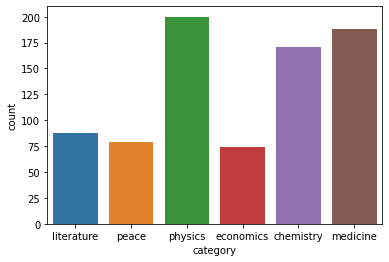

In [14]:
show_category_column(train_df,"category")

row_count 800
null_count 0
distinct_value_count 2

distinct_value_list
male      759
female     41
Name: gender, dtype: int64


E:\9.12.10C\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


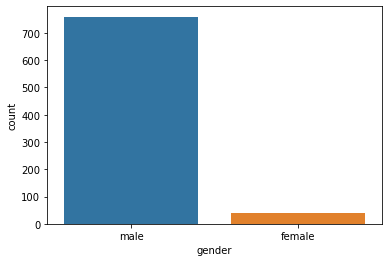

In [15]:
show_category_column(train_df,"gender")

In [16]:
def show_numeric_column( df, column_name):
    one_column = df.loc[:, column_name]

    print("head")
    print(one_column.head())
    print("")

    # row_count
    row_count = one_column.shape[0]
    print("row_count",row_count)

    # null_count
    null_count = one_column.shape[0] - one_column.count()    
    print("null_count", null_count)

    #distinct_value_count
    distinct_value_count = one_column.nunique()
    print("distinct_value_count", distinct_value_count)

    # distribution
    fig = plt.figure(figsize=(50,8))
    sns.distplot(one_column.dropna(), color='blue', label=column_name, ax=plt.subplot(222))
    plt.show()

    #box
    train_df.boxplot(column=[column_name],showfliers=True)
    
    plt.show()

head
0    1912
1    1961
2    1961
3    1958
4    1958
Name: year, dtype: int64

row_count 800
null_count 0
distinct_value_count 114


E:\9.12.10C\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


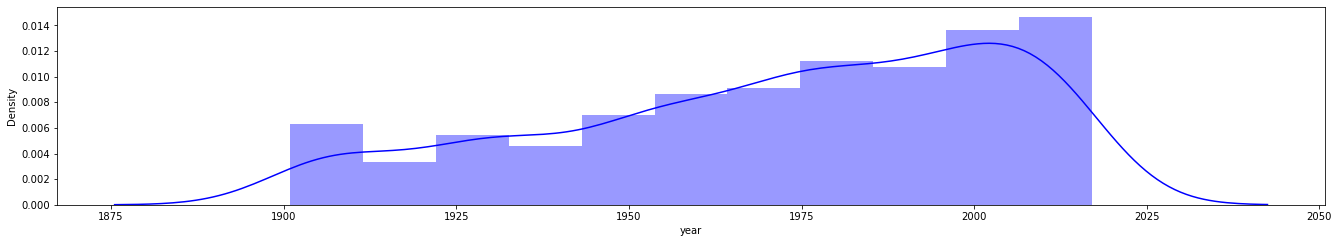

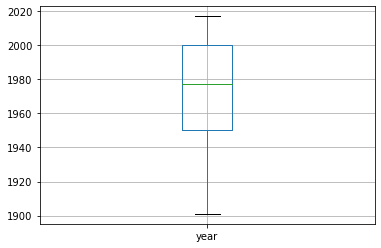

In [17]:
show_numeric_column(train_df,"year")

In [18]:
#异常值检测
Q1 = train_df['year'].quantile(0.25)
Q3 = train_df['year'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("lower",lower)
print("upper",upper)

print("Max year", train_df['year'].max())
print("Min year", train_df['year'].min())

#接下来的处理应该是把year>upper的都置换为upper（lower方面同理），但发现没有异常值）

lower 1875.0
upper 2075.0
Max year 2017
Min year 1901


In [19]:
#字段编码
#['male','female']变成[0,1]

def encode_Sex(old):
    if old == 'male':
        return 0
    elif old == 'female':
        return 1
    else:
        return old


In [20]:
one_column = train_df["gender"]
one_column = one_column.apply(encode_Sex)
train_df["gender2"] = one_column

train_df.head()

#最后面多了一列gender2，head处的几个科学家都是男，即0

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,diedCoordinates,gender,year,category,motivation,institutionName,institutionCity,institutionCountry,prizeold,gender2
0,Gerhart Johann Robert Hauptmann,1862,1946,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,"50.8221069, 15.6171685",male,1912,literature,"""primarily in recognition of his fruitful, var...",NaN,NaN,NaN,50,0
1,Dag Hjalmar Agne Carl Hammarskj枚ld,1905,1961,Sweden,Sweden,J枚nk枚ping,J枚nk枚ping,"J枚nk枚ping, Sweden",14.161788,57.782614,...,"-12.9906407, 28.6498144",male,1961,peace,NaN,NaN,NaN,NaN,56,0
2,Ivo Andric,1892,1975,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,"44.786568, 20.4489216",male,1961,literature,"""for the epic force with which he has traced t...",NaN,NaN,NaN,69,0
3,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,"55.755826, 37.6172999",male,1958,physics,"""for the discovery and the interpretation of t...",University of Moscow,Moscow,USSR,50,0
4,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,"55.755826, 37.6172999",male,1958,physics,"""for the discovery and the interpretation of t...",P.N. Lebedev Physical Institute,Moscow,USSR,50,0


In [21]:
#进行缺失值处理，我发现很多缺失字段不太适合简单替换和处理
#因此只对motivation处理
train_df['motivation'].fillna('For the discovery',inplace=True)
print("motivation",train_df['motivation'].value_counts())
#现在For the discovery数量最多了，并且远高于原本最高的值

motivation For the discovery                                                                                                54
"for the discovery of the accelerating expansion of the Universe through observations of distant supernovae"      5
"for the discovery and the interpretation of the Cherenkov effect"                                                5
"for mechanistic studies of DNA repair"                                                                           5
"for the discovery and development of the green fluorescent protein, GFP"                                         5
                                                                                                                 ..
"for his invention of the polymerase chain reaction (PCR) method"                                                 1
"for his development of the theory and methodology of organic synthesis"                                          1
"for their discovery of catalytic properties of RNA"         

In [22]:
#选择对category进行编码处理
print("category",train_df['category'].value_counts())
def encode_category(old):
    if old == 'physics':
        return 0
    elif old == 'medicine':
        return 1
    elif old == 'chemistry':
        return 2
    elif old == 'literature':
        return 3
    elif old == 'peace':
        return 4
    elif old == 'economics':
        return 5
    else:
        return old
#这样处理，[physics,medicine,chemistry,literature,peace,economics]
#变为[0,1,2,3,4,5]

category physics       200
medicine      188
chemistry     171
literature     88
peace          79
economics      74
Name: category, dtype: int64


In [23]:
one_column = train_df["category"]
one_column = one_column.apply(encode_category)
train_df["category2"] = one_column

train_df.head()

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,gender,year,category,motivation,institutionName,institutionCity,institutionCountry,prizeold,gender2,category2
0,Gerhart Johann Robert Hauptmann,1862,1946,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,male,1912,literature,"""primarily in recognition of his fruitful, var...",NaN,NaN,NaN,50,0,3
1,Dag Hjalmar Agne Carl Hammarskj枚ld,1905,1961,Sweden,Sweden,J枚nk枚ping,J枚nk枚ping,"J枚nk枚ping, Sweden",14.161788,57.782614,...,male,1961,peace,For the discovery,NaN,NaN,NaN,56,0,4
2,Ivo Andric,1892,1975,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,male,1961,literature,"""for the epic force with which he has traced t...",NaN,NaN,NaN,69,0,3
3,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,male,1958,physics,"""for the discovery and the interpretation of t...",University of Moscow,Moscow,USSR,50,0,0
4,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,male,1958,physics,"""for the discovery and the interpretation of t...",P.N. Lebedev Physical Institute,Moscow,USSR,50,0,0


In [24]:
#选择对bornCountry_now进行编码处理
print("bornCountry_now",train_df['bornCountry_now'].value_counts())
def encode_bornCountry_now(old):
    if old == 'USA':
        return 0
    elif old == 'United Kingdom':
        return 1
    elif old == 'Germany':
        return 2
    elif old == 'Japan':
        return 3
    elif old == 'Russia':
        return 4
    else:
        return 5
    
one_column = train_df["bornCountry_now"]
one_column = one_column.apply(encode_bornCountry_now)
train_df["bornCountry_now2"] = one_column

train_df.head()

bornCountry_now USA                  285
United Kingdom        87
Germany               84
Japan                 30
Russia                30
                    ... 
Bangladesh             1
Yemen                  1
Vietnam                1
Venezuela              1
Guadeloupe Island      1
Name: bornCountry_now, Length: 65, dtype: int64


,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,year,category,motivation,institutionName,institutionCity,institutionCountry,prizeold,gender2,category2,bornCountry_now2
0,Gerhart Johann Robert Hauptmann,1862,1946,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,1912,literature,"""primarily in recognition of his fruitful, var...",NaN,NaN,NaN,50,0,3,2
1,Dag Hjalmar Agne Carl Hammarskj枚ld,1905,1961,Sweden,Sweden,J枚nk枚ping,J枚nk枚ping,"J枚nk枚ping, Sweden",14.161788,57.782614,...,1961,peace,For the discovery,NaN,NaN,NaN,56,0,4,5
2,Ivo Andric,1892,1975,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,1961,literature,"""for the epic force with which he has traced t...",NaN,NaN,NaN,69,0,3,5
3,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,1958,physics,"""for the discovery and the interpretation of t...",University of Moscow,Moscow,USSR,50,0,0,4
4,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,1958,physics,"""for the discovery and the interpretation of t...",P.N. Lebedev Physical Institute,Moscow,USSR,50,0,0,4


lower 1832.5
upper 1998.5
Max born 1997
Min born 1817
head
0    1862.0
1    1905.0
2    1892.0
3    1908.0
4    1908.0
Name: born2, dtype: float64

row_count 800
null_count 0
distinct_value_count 131


E:\9.12.10C\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


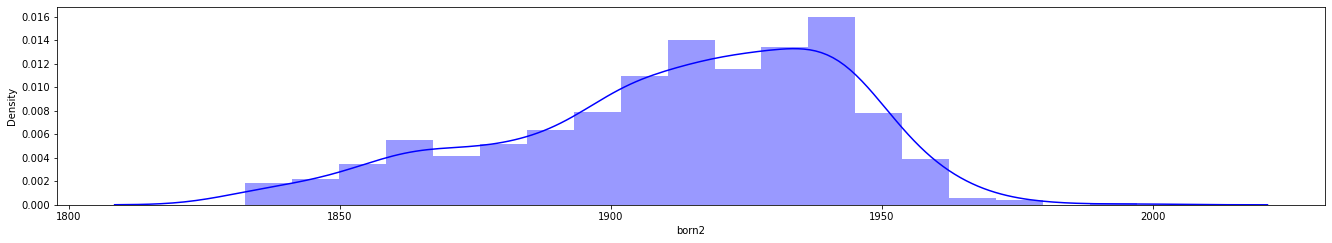

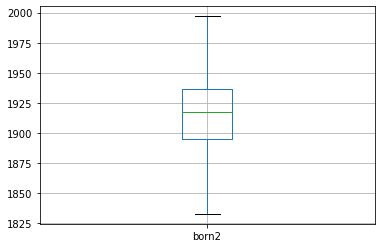

In [25]:
#异常值检测
#born和died值为0的，是异常值/缺失值
Q1 = train_df['born'].quantile(0.25)
Q3 = train_df['born'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("lower",lower)
print("upper",upper)

print("Max born", train_df['born'].max())
print("Min born", train_df['born'].min())

def encode_born(old,upper,lower):
    if old <= upper and old >= lower:
        return old
    elif old <= lower:
        return lower
    else:
        return upper
one_column = train_df["born"]
one_column = one_column.apply(encode_born,upper=upper,lower=lower)
train_df["born2"] = one_column
show_numeric_column(train_df,"born2")

#这下born部分的处理完毕

lower -2988.0
upper 4980.0
Max died 2018
Min died 0
head
0    1946
1    1961
2    1975
3    1990
4    1990
Name: died2, dtype: int64

row_count 800
null_count 0
distinct_value_count 110


E:\9.12.10C\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


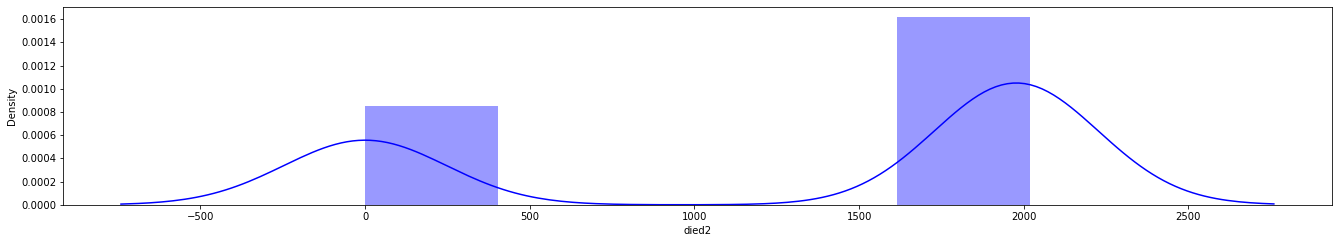

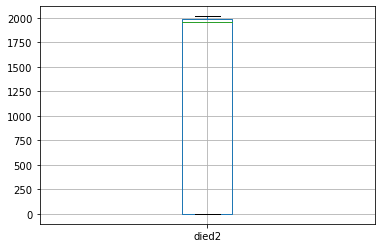

In [26]:
#异常值检测
#born和died值为0的，是异常值/缺失值
Q1 = train_df['died'].quantile(0.25)
Q3 = train_df['died'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("lower",lower)
print("upper",upper)

print("Max died", train_df['died'].max())
print("Min died", train_df['died'].min())

def encode_died(old,upper,lower):
    if old <= upper and old >= lower:
        return old
    elif old <= lower:
        return lower
    else:
        return upper
one_column = train_df["died"]
one_column = one_column.apply(encode_died,upper=upper,lower=lower)
train_df["died2"] = one_column
show_numeric_column(train_df,"died2")

#这下died部分的处理完毕，发现值为0的太多。推测是有太多人还没有去世。因此本次做出的died2暂时作废

In [27]:
Q1 = train_df['prizeold'].quantile(0.25)
Q3 = train_df['prizeold'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("lower",lower)
print("upper",upper)

print("Max prizeold", train_df['prizeold'].max())
print("Min prizeold", train_df['prizeold'].min())

lower 21.5
upper 97.5
Max prizeold 90
Min prizeold 17


In [28]:
#对获奖年龄进行离散化
#0 1 
def encode_Prizeold(old):
    if old <= 45:
        return 0
    else:
        return 1

one_column = train_df["prizeold"]
one_column = one_column.apply(encode_Prizeold)
train_df["prizeold2"] = one_column

print("prizeold2",train_df['prizeold2'].value_counts())

prizeold2 1    692
0    108
Name: prizeold2, dtype: int64


In [29]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
one_column = min_max_scaler.fit_transform(train_df[["prizeold"]])

train_df["prizeold_min_max_scaler"] = one_column
train_df.head()

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,institutionCity,institutionCountry,prizeold,gender2,category2,bornCountry_now2,born2,died2,prizeold2,prizeold_min_max_scaler
0,Gerhart Johann Robert Hauptmann,1862,1946,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,NaN,NaN,50,0,3,2,1862.0,1946,1,0.452055
1,Dag Hjalmar Agne Carl Hammarskj枚ld,1905,1961,Sweden,Sweden,J枚nk枚ping,J枚nk枚ping,"J枚nk枚ping, Sweden",14.161788,57.782614,...,NaN,NaN,56,0,4,5,1905.0,1961,1,0.534247
2,Ivo Andric,1892,1975,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,NaN,NaN,69,0,3,5,1892.0,1975,1,0.712329
3,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,Moscow,USSR,50,0,0,4,1908.0,1990,1,0.452055
4,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,Moscow,USSR,50,0,0,4,1908.0,1990,1,0.452055


In [30]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
one_column = standardScaler.fit_transform(train_df[["prizeold"]])

train_df["prizeold_std_scaler"] = one_column
train_df.head()

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,institutionCountry,prizeold,gender2,category2,bornCountry_now2,born2,died2,prizeold2,prizeold_min_max_scaler,prizeold_std_scaler
0,Gerhart Johann Robert Hauptmann,1862,1946,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,NaN,50,0,3,2,1862.0,1946,1,0.452055,-0.769114
1,Dag Hjalmar Agne Carl Hammarskj枚ld,1905,1961,Sweden,Sweden,J枚nk枚ping,J枚nk枚ping,"J枚nk枚ping, Sweden",14.161788,57.782614,...,NaN,56,0,4,5,1905.0,1961,1,0.534247,-0.282397
2,Ivo Andric,1892,1975,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,NaN,69,0,3,5,1892.0,1975,1,0.712329,0.772156
3,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,USSR,50,0,0,4,1908.0,1990,1,0.452055,-0.769114
4,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,USSR,50,0,0,4,1908.0,1990,1,0.452055,-0.769114


In [31]:
# category 变量与目标变量

In [32]:
#test
list1 = [1,2,3,np.nan]
list1 =[ 0 if np.isnan(i) else i for i in list1]
print (list1)

[1, 2, 3, 0]


In [33]:
def category_plot( column, train_data):
    fig = plt.figure(figsize=(12,6)) # Figure initiation
    
    # Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(111));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    # Setting Legend location 
    plt.legend(loc=1);
    
    # Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    height =[ 0 if np.isnan(i) else i for i in height]
    #print("height",height)
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    total =[ 0 if np.isnan(i) else i for i in total]
    #print("total",total)
    
   # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        pos_x = p.get_x()+p.get_width()/2
        pos_y = height[i]*1.01 + 10
        #print("pos_x", pos_x)
        #print("pos_y", pos_y)
        ax.text( pos_x, pos_y,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 
    plt.show()

In [34]:
train_df['target_name'] = train_df['prizeold2'].map({0: 'youth', 1: 'old'})
train_df.head()

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,...,prizeold,gender2,category2,bornCountry_now2,born2,died2,prizeold2,prizeold_min_max_scaler,prizeold_std_scaler,target_name
0,Gerhart Johann Robert Hauptmann,1862,1946,Prussia (now Germany),Germany,Bad Salzbrunn,Bad Salzbrunn,"Bad Salzbrunn, Germany",NaN,NaN,...,50,0,3,2,1862.0,1946,1,0.452055,-0.769114,old
1,Dag Hjalmar Agne Carl Hammarskj枚ld,1905,1961,Sweden,Sweden,J枚nk枚ping,J枚nk枚ping,"J枚nk枚ping, Sweden",14.161788,57.782614,...,56,0,4,5,1905.0,1961,1,0.534247,-0.282397,old
2,Ivo Andric,1892,1975,Bosnia (now Bosnia and Herzegovina),Bosnia and Herzegovina,Dolac,Dolac,"Dolac, Bosnia and Herzegovina",17.990100,44.086069,...,69,0,3,5,1892.0,1975,1,0.712329,0.772156,old
3,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,50,0,0,4,1908.0,1990,1,0.452055,-0.769114,old
4,Il麓ja Mikhailovich Frank,1908,1990,Russia,Russia,Leningrad (now Saint Petersburg),Saint Petersburg,"Saint Petersburg, Russia",30.335099,59.934280,...,50,0,0,4,1908.0,1990,1,0.452055,-0.769114,old


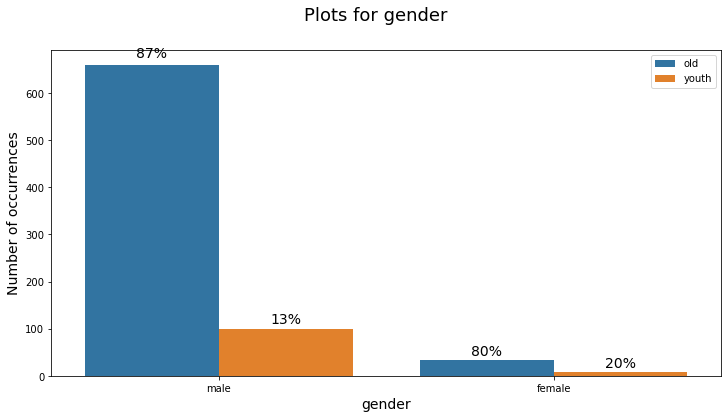

In [35]:
category_plot("gender", train_df)
#解释作用不太强

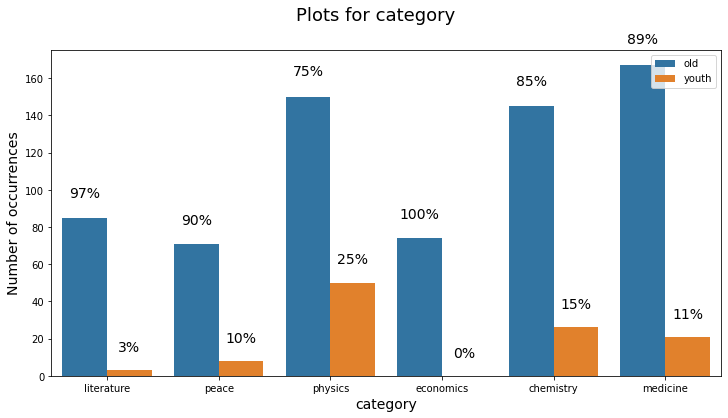

In [36]:
category_plot("category", train_df)
#具有解释作用

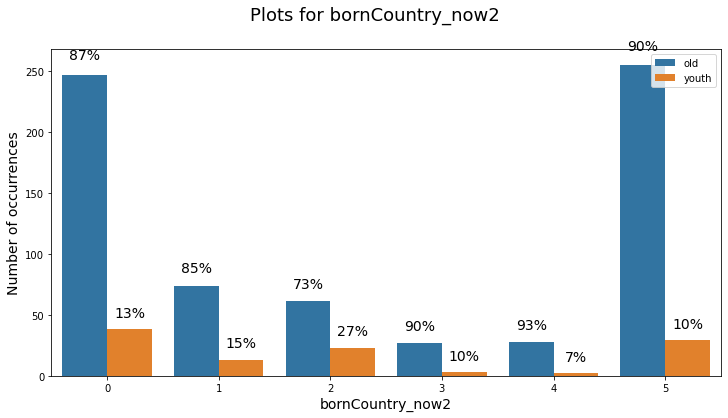

In [37]:
category_plot("bornCountry_now2", train_df)
#具有一定解释作用

In [38]:
#numeric 变量与目标变量

In [39]:
def numeric_plot( column, train_data):
    fig = plt.figure(figsize=(12,8))# Figure initiation
    
    # Youth hist
    sns.distplot(train_data.loc[train_df.prizeold2==0, column].dropna(),
                 color='red', label='youth', ax=plt.subplot(211));
    # Old age hist
    sns.distplot(train_data.loc[train_df.prizeold2==1, column].dropna(),
                 color='blue', label='old', ax=plt.subplot(211));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density Value', fontsize=14);
    
    # Boxplot of Column per Youth / Old Value
    sns.boxplot(x="target_name", y=column, data=train_df, ax=plt.subplot(212));
    # X-axis Label
    plt.xlabel('youth or old age?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

E:\9.12.10C\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\9.12.10C\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


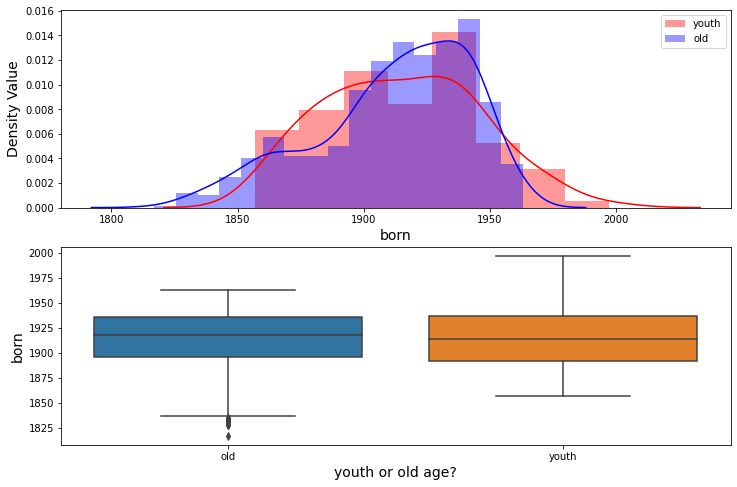

In [40]:
numeric_plot("born", train_df)

E:\9.12.10C\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\9.12.10C\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


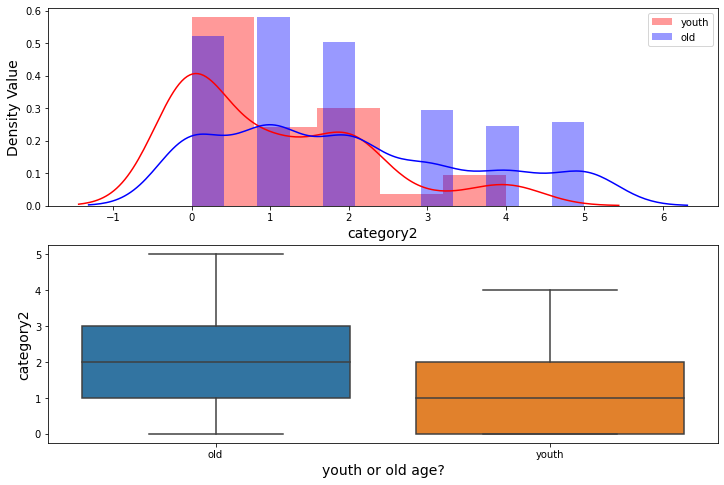

In [41]:
numeric_plot("category2", train_df)

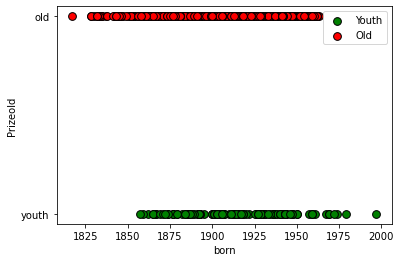

In [42]:
df_Youth = train_df[train_df.target_name == 'youth']
df_Old = train_df[train_df.target_name == 'old']
x_Youth = df_Youth["born"]
y_Youth = df_Youth["target_name"]
x_Old = df_Old["born"]
y_Old = df_Old["target_name"]

plt.scatter(x_Youth, y_Youth, 60, edgecolors='black', c='green', label = 'Youth')
plt.scatter(x_Old, y_Old, 60, edgecolors='black', c='red', label = 'Old')
plt.xlabel("born")
plt.ylabel("Prizeold")
plt.legend()
plt.show()

#Youth和Old的学者的出生年份分布，有区别，具有研究意义

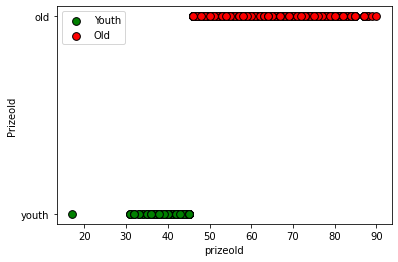

In [43]:
df_Youth = train_df[train_df.target_name == 'youth']
df_Old = train_df[train_df.target_name == 'old']
x_Youth = df_Youth["prizeold"]
y_Youth = df_Youth["target_name"]
x_Old = df_Old["prizeold"]
y_Old = df_Old["target_name"]

plt.scatter(x_Youth, y_Youth, 60, edgecolors='black', c='green', label = 'Youth')
plt.scatter(x_Old, y_Old, 60, edgecolors='black', c='red', label = 'Old')
plt.xlabel("prizeold")
plt.ylabel("Prizeold")
plt.legend()
plt.show()

#Youth和Old内部的具体年龄分布，可以发现Youth似乎有一个离群值，经过查找，\
#发现这其实是17岁的马拉拉在2014年获得的诺贝尔和平奖。马拉拉相关故事这里不表

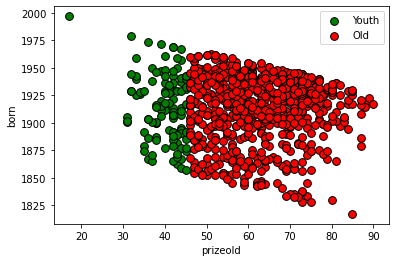

In [44]:
df_Youth = train_df[train_df.target_name == 'youth']
df_Old = train_df[train_df.target_name == 'old']
x_Youth = df_Youth["prizeold"]
y_Youth = df_Youth["born"]
x_Old = df_Old["prizeold"]
y_Old = df_Old["born"]

plt.scatter(x_Youth, y_Youth, 60, edgecolors='black', c='green', label = 'Youth')
plt.scatter(x_Old, y_Old, 60, edgecolors='black', c='red', label = 'Old')
plt.xlabel("prizeold")
plt.ylabel("born")
plt.legend()
plt.show()

#得奖年龄和出生年份的双重影响，可以看出整体是有明显区别的

In [45]:
train_df2 = train_df[["born","died","prizeold","gender2","category2","prizeold2","bornCountry_now2"]]
train_df2.head()

,born,died,prizeold,gender2,category2,prizeold2,bornCountry_now2
0,1862,1946,50,0,3,1,2
1,1905,1961,56,0,4,1,5
2,1892,1975,69,0,3,1,5
3,1908,1990,50,0,0,1,4
4,1908,1990,50,0,0,1,4


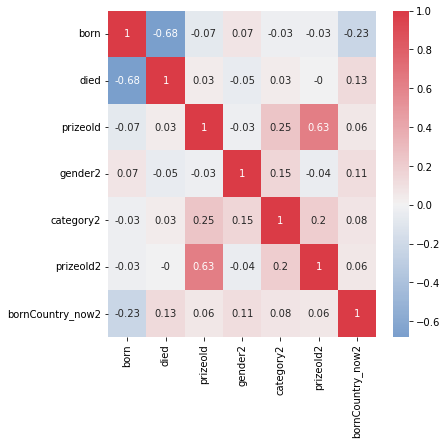

In [46]:
cor_matrix = train_df2.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(6,6));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

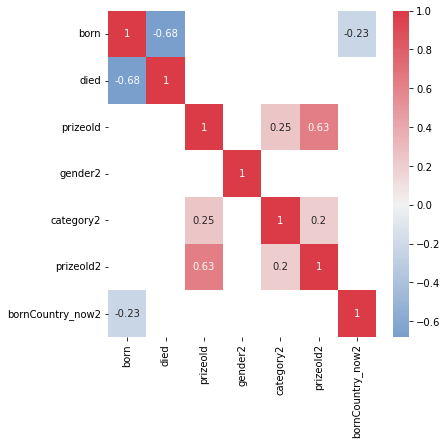

In [47]:
cor_matrix = train_df2.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(6,6));
kot = cor_matrix[abs(cor_matrix)>=.20]
sns.heatmap(kot, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

In [48]:
print(train_df2.size)

5600


In [49]:
train_df2 = train_df2.dropna()
print(train_df2.size)

5600


In [50]:
X_train = train_df2.drop("prizeold2",axis=1)
Y_train = train_df2["prizeold2"]

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)
logreg.score(X_train, Y_train)

0.9925

In [52]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)
decision_tree.score(X_train, Y_train)

1.0

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() 

knn.fit(X_train,Y_train)
knn.score(X_train, Y_train)

0.98

In [54]:
#补充

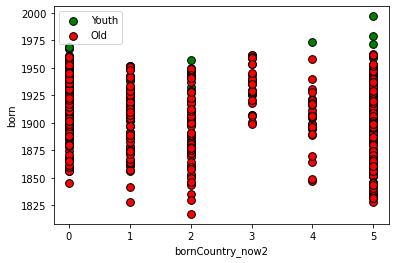

In [55]:
df_Youth = train_df[train_df.target_name == 'youth']
df_Old = train_df[train_df.target_name == 'old']
x_Youth = df_Youth["bornCountry_now2"]
y_Youth = df_Youth["born"]
x_Old = df_Old["bornCountry_now2"]
y_Old = df_Old["born"]

plt.scatter(x_Youth, y_Youth, 60, edgecolors='black', c='green', label = 'Youth')
plt.scatter(x_Old, y_Old, 60, edgecolors='black', c='red', label = 'Old')
plt.xlabel("bornCountry_now2")
plt.ylabel("born")
plt.legend()
plt.show()

#出生国家和年代的双重影响

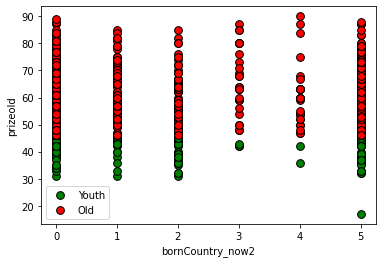

In [56]:
df_Youth = train_df[train_df.target_name == 'youth']
df_Old = train_df[train_df.target_name == 'old']
x_Youth = df_Youth["bornCountry_now2"]
y_Youth = df_Youth["prizeold"]
x_Old = df_Old["bornCountry_now2"]
y_Old = df_Old["prizeold"]

plt.scatter(x_Youth, y_Youth, 60, edgecolors='black', c='green', label = 'Youth')
plt.scatter(x_Old, y_Old, 60, edgecolors='black', c='red', label = 'Old')
plt.xlabel("bornCountry_now2")
plt.ylabel("prizeold")
plt.legend()
plt.show()

#出生国家和获奖具体年龄的双重影响

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris.target

In [4]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis = 1),df['target'],test_size = 0.3)
BC = BaggingClassifier()

param_grid = {
    'n_estimators':[50,100,200],
    #'max_depth':[2,5,10],
    #'min_samples_split':[2,5,10],
    #'min_samples_leaf':[1,2,4]
}

grid_search = GridSearchCV(estimator=BC,param_grid=param_grid,cv=5)
BC = grid_search.fit(X_train,y_train)

In [31]:
y_predict = BC.predict(X_test)

In [32]:
print("Accuracy:",BC.score(X_test,y_test))

Accuracy: 0.9555555555555556


In [33]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 导入iris数据集
iris = load_iris()
X, y = iris.data, iris.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# 初始化不同分类器算法的Bagging模型
dtc_bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42)
mlp_bagging = BaggingClassifier(MLPClassifier(hidden_layer_sizes=(50,)), n_estimators=10, random_state=42)
gnb_bagging = BaggingClassifier(GaussianNB(), n_estimators=10, random_state=42)
lr_bagging = BaggingClassifier(LogisticRegression(), n_estimators=10, random_state=42)
svm_bagging = BaggingClassifier(SVC(kernel='linear', probability=True), n_estimators=10, random_state=42)

# 训练不同分类器算法的Bagging模型
dtc_bagging.fit(X_train, y_train)
mlp_bagging.fit(X_train, y_train)
gnb_bagging.fit(X_train, y_train)
lr_bagging.fit(X_train, y_train)
svm_bagging.fit(X_train, y_train)

E:\9.12.10C\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\9.12.10C\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\9.12.10C\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\9.12.10C\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\9.12.10C\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer

BaggingClassifier(base_estimator=SVC(kernel='linear', probability=True),
                  random_state=42)

In [36]:
# 预测并评估决策树算法的Bagging模型
y_pred_dtc_bagging = dtc_bagging.predict(X_test)
acc_dtc_bagging = accuracy_score(y_test, y_pred_dtc_bagging)

# 预测并评估多层感知机算法的Bagging模型
y_pred_mlp_bagging = mlp_bagging.predict(X_test)
acc_mlp_bagging = accuracy_score(y_test, y_pred_mlp_bagging)

# 预测并评估朴素贝叶斯算法的Bagging模型
y_pred_gnb_bagging = gnb_bagging.predict(X_test)
acc_gnb_bagging = accuracy_score(y_test, y_pred_gnb_bagging)

# 预测并评估罗辑回归算法的Bagging模型
y_pred_lr_bagging = lr_bagging.predict(X_test)
acc_lr_bagging = accuracy_score(y_test, y_pred_lr_bagging)

# 预测并评估支持向量机算法的Bagging模型
y_pred_svm_bagging = svm_bagging.predict(X_test)
acc_svm_bagging = accuracy_score(y_test, y_pred_svm_bagging)

In [38]:
# 输出不同分类器算法的Bagging模型的准确率
print("acc_dtc：",acc_dtc_bagging)
print("acc_mlp：",acc_mlp_bagging)
print("acc_gnb：",acc_gnb_bagging)
print("acc_lr：",acc_lr_bagging)
print("acc_svm：",acc_svm_bagging)

acc_dtc： 1.0
acc_mlp： 1.0
acc_gnb： 0.9777777777777777
acc_lr： 1.0
acc_svm： 1.0


In [39]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [40]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
model_dt = DecisionTreeClassifier()
bag_dt = BaggingClassifier(model_dt, n_estimators=10, random_state=0)
bag_dt.fit(X_train, y_train)
y_pred_dt = bag_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# MLP
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
bag_mlp = BaggingClassifier(model_mlp, n_estimators=10, random_state=0)
bag_mlp.fit(X_train, y_train)
y_pred_mlp = bag_mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

# Naive Bayes
model_nb = GaussianNB()
bag_nb = BaggingClassifier(model_nb, n_estimators=10, random_state=0)
bag_nb.fit(X_train, y_train)
y_pred_nb = bag_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Logistic Regression
model_lr = LogisticRegression(random_state=0)
bag_lr = BaggingClassifier(model_lr, n_estimators=10, random_state=0)
bag_lr.fit(X_train, y_train)
y_pred_lr = bag_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# SVM
model_svm = SVC(kernel='linear', random_state=0)
bag_svm = BaggingClassifier(model_svm, n_estimators=10, random_state=0)
bag_svm.fit(X_train, y_train)
y_pred_svm = bag_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

E:\9.12.10C\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\9.12.10C\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [43]:
print("Decision Tree: %.2f%%" % (acc_dt*100))
print("MLP: %.2f%%" % (acc_mlp*100))
print("Naive Bayes: %.2f%%" % (acc_nb*100))
print("Logistic Regression: %.2f%%" % (acc_lr*100))
print("SVM: %.2f%%" % (acc_svm*100))

Decision Tree: 96.67%
MLP: 100.00%
Naive Bayes: 96.67%
Logistic Regression: 96.67%
SVM: 100.00%


In [44]:
BC = BaggingClassifier()

param_grid = {
    'n_estimators':[50,100,200],
    #'max_depth':[2,5,10],
    #'min_samples_split':[2,5,10],
    #'min_samples_leaf':[1,2,4]
}

grid_search = GridSearchCV(estimator=BC,param_grid=param_grid,cv=5)
BC = grid_search.fit(X_train,y_train)

In [45]:
print("Best param:",grid_search.best_params_)
print("Best score:",grid_search.best_score_)

Best param: {'n_estimators': 200}
Best score: 0.95


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 创建随机森林分类器对象
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 拟合数据集
rf_clf.fit(X_train, y_train)

# 预测测试集
rf_y_pred = rf_clf.predict(X_test)

# 计算精确度和混淆矩阵
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Classifier Accuracy: ", rf_accuracy)
print("Random Forest Classifier Confusion Matrix: ")
print(rf_cm)

Random Forest Classifier Accuracy:  0.9666666666666667
Random Forest Classifier Confusion Matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 分类器列表
classifiers = [
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    SVC(probability=True)
]

for clf in classifiers:
    # 创建Bagging分类器对象
    bagging_clf = BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=42)

    # 拟合数据集
    bagging_clf.fit(X_train, y_train)

    # 预测测试集
    y_pred = bagging_clf.predict(X_test)

    # 计算精确度和混淆矩阵
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # 打印结果
    clf_name = clf.__class__.__name__
    print(clf_name, "Accuracy: ", accuracy)
    print(clf_name, "Confusion Matrix: ")
    print(cm)
    print("------------------------------")

DecisionTreeClassifier Accuracy:  0.9666666666666667
DecisionTreeClassifier Confusion Matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
------------------------------
MLPClassifier Accuracy:  1.0
MLPClassifier Confusion Matrix: 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
------------------------------
GaussianNB Accuracy:  0.9333333333333333
GaussianNB Confusion Matrix: 
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
------------------------------
LogisticRegression Accuracy:  0.9666666666666667
LogisticRegression Confusion Matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
------------------------------
SVC Accuracy:  0.9666666666666667
SVC Confusion Matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
------------------------------
